In [12]:
from mavis import *

%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [13]:
xx, yy = np.linspace(-15, 15,5), np.linspace(-15,15,5)
cartPointingCoords =  np.dstack(np.meshgrid(xx, yy)).reshape(-1, 2)
NGS_flux = [10000, 30000, 5000]
NGS_SR_1650 = [0.4, 0.2, 0.6]
NGS_FWHM_mas = [90, 110, 85]
polarNGSCoords = np.asarray([[30.0,0.0], [50.0,100.0],[10.0,240.0]])
#polarNGSCoords = np.asarray([[10.0,0.0], [10.0,120.0],[10.0,240.0]])
cartNGSCoords = np.asarray([polarToCartesian(polarNGSCoords[0,:]), polarToCartesian(polarNGSCoords[1,:]), polarToCartesian(polarNGSCoords[2,:])])
mLO = MavisLO("/home/frossi/dev/MASTSEL/", 'mavisParams', 'data/windpsd_mavis.fits')

In [14]:
%%time 
Ctot = mLO.computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas)

CPU times: user 1.56 s, sys: 300 ms, total: 1.86 s
Wall time: 1.86 s


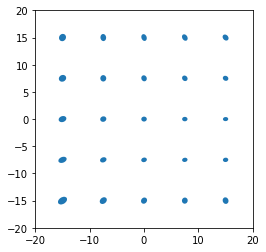

In [17]:
%matplotlib inline
cov_ellipses = mLO.ellipsesFromCovMats(Ctot)
plotEllipses(cartPointingCoords, cov_ellipses, 0.2)

In [15]:
#%lprun -f MavisLO.computeTotalResidualMatrix Ctot = mLO.computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas)

In [16]:
#print('Ctot', Ctot)
#Ctot [[[18545.18136324  3308.78460439]
#  [ 3308.78460439 20872.5522838 ]]
# [[28.59791617 -3.8054102  35.15831592 -1.7180003  46.33356834 -0.51767148]
#  [-3.8054102  38.74567669 -1.7180003  17.85779335 -0.51767148 46.82192702]]

In [ ]:
#%%time
cartNGSCoords = np.asarray([polarToCartesian(polarNGSCoords[0,:]), polarToCartesian(polarNGSCoords[1,:]), polarToCartesian(polarNGSCoords[2,:])])
Ctot = computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas, True)
print('Ctot', Ctot)
Ctot = np.asarray(Ctot)
cov_ellipses = ellipsesFromCovMats(Ctot)

In [ ]:
scale =1.0
print(0.5 * np.arctan( 2*-2405.86006388 / ( 12145.83654855-14191.5529846 )))
print(np.sqrt( 0.5 * ( 2*-2405.86006388 / np.sin(2*0.5843981184677838) + 12145.83654855+14191.5529846) ) / scale)
print( np.sqrt(12145.83654855+14191.5529846-10554.42592401998)/scale )
# manca conversione da nanometri a mas:


In [ ]:
%%timeit
Ctot = computeTotalResidualMatrix(cartPointingCoords, cartNGSCoords, NGS_flux, NGS_SR_1650, NGS_FWHM_mas)